# Cleaning the training-set and dealing with missing values

                             Missing Values  Percentage (%)
employment_occupation                 13470       50.436215
employment_industry                   13330       49.912008
health_insurance                      12274       45.957989
income_poverty                         4423       16.561201
doctor_recc_h1n1                       2160        8.087767
doctor_recc_seasonal                   2160        8.087767
rent_or_own                            2042        7.645936
employment_status                      1463        5.477965
marital_status                         1408        5.272026
education                              1407        5.268282
chronic_med_condition                   971        3.635751
child_under_6_months                    820        3.070356
health_worker                           804        3.010447
opinion_seas_sick_from_vacc             537        2.010709
opinion_seas_risk                       514        1.924589
opinion_seas_vacc_effective             

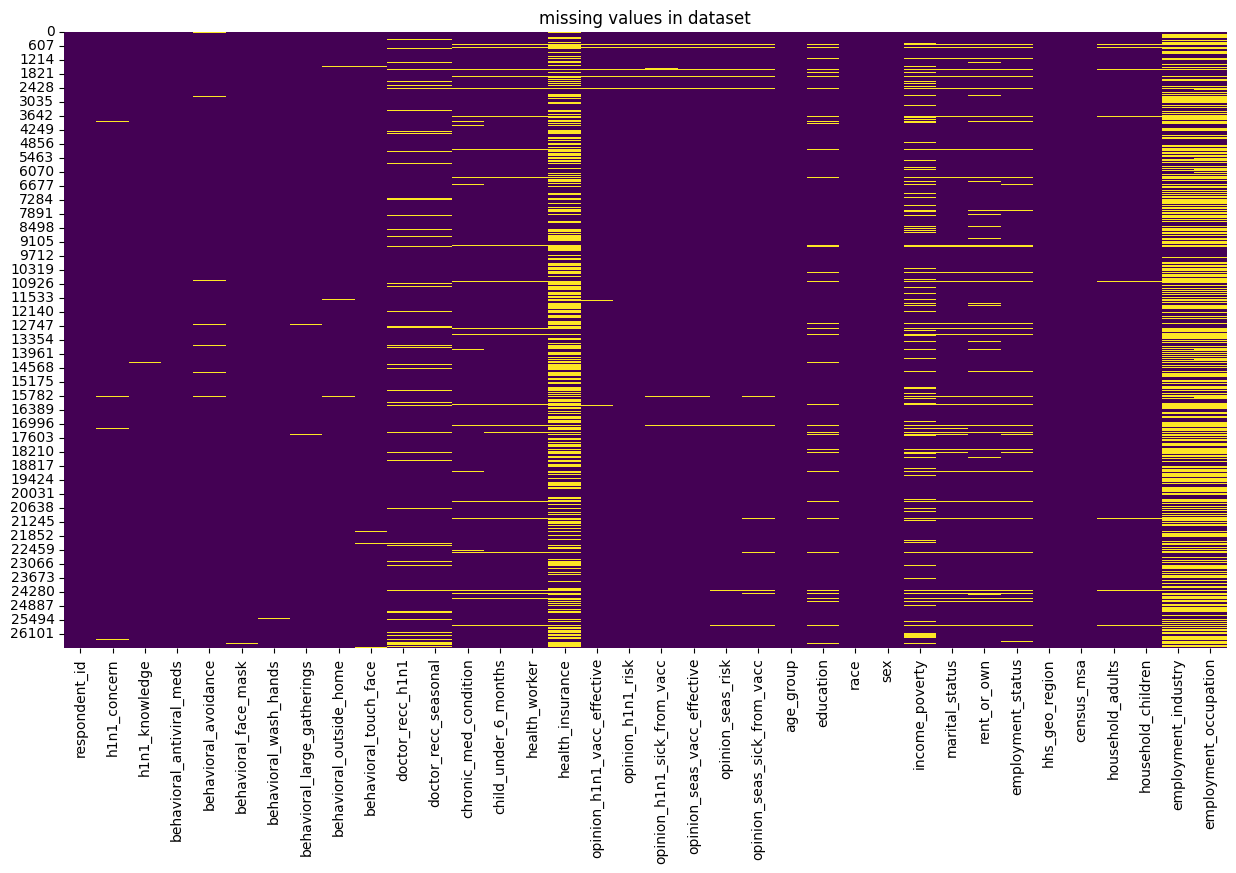

IDs entfernt: [562, 587, 692, 968, 1139, 1368, 1564, 1646, 1672, 1858, 1898, 2054, 2174, 2264, 2420, 2428, 2470, 2506, 2695, 2728, 3438, 3457, 3483, 3694, 3745, 3772, 4076, 4092, 4146, 4316, 4328, 5163, 5173, 5304, 5588, 5889, 5909, 5978, 5979, 6008, 6040, 6105, 6230, 6436, 6520, 6537, 6614, 6801, 7102, 7271, 7643, 7749, 7854, 7878, 8026, 8229, 8230, 8240, 8624, 8907, 9350, 9407, 9439, 9642, 9727, 9867, 9996, 10133, 10179, 10236, 10237, 10246, 10271, 10358, 10364, 10426, 10628, 10716, 10742, 10796, 10945, 11318, 11487, 11525, 11770, 11795, 11825, 12083, 12130, 12469, 12531, 12535, 12629, 13065, 13644, 14050, 14085, 14241, 14266, 14518, 14630, 14910, 14975, 15056, 15277, 15297, 15356, 15365, 15425, 15580, 15591, 15678, 15772, 15788, 15799, 16184, 16471, 16723, 17016, 17192, 17487, 17565, 17700, 17837, 17984, 18227, 18234, 18268, 18279, 18370, 18443, 18448, 18547, 18755, 18879, 19084, 19102, 19456, 19463, 19559, 19565, 19566, 19634, 19647, 19986, 20065, 20082, 20212, 20335, 20351, 20432,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# load data
file_path = "training_set_features.csv"
labels_file_path = "training_set_labels.csv"
data = pd.read_csv(file_path)
labels = pd.read_csv(labels_file_path)

# calculation of missing values per column
missing_values_abs = data.isnull().sum()
missing_values_percent = (data.isnull().sum() / data.shape[0]) * 100

# summarize missing values in a DataFrame
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_abs,
    'Percentage (%)': missing_values_percent
}).sort_values(by='Missing Values', ascending=False)
print(missing_values_summary)


# visualization of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('missing values in dataset')
plt.show()

# save missing values in CSV
missing_values_summary_path = 'missing_values_summary_trainingset.csv'
missing_values_summary.to_csv(missing_values_summary_path)

# delete records with 19 or more missing values
data['missing_values_count'] = data.isnull().sum(axis=1)
ids_to_remove = data[data['missing_values_count'] >= 19]['respondent_id']
print("IDs entfernt:", ids_to_remove.tolist())
data_cleaned = data[~data['respondent_id'].isin(ids_to_remove)].copy()
labels_cleaned = labels[~labels['respondent_id'].isin(ids_to_remove)].copy()


# analysis of distribution of missing values
missing_values_distribution = data['missing_values_count'].value_counts().sort_index()
print(missing_values_distribution)
data_cleaned.drop(['missing_values_count'], axis=1, inplace=True)

# replace with "missing" if no value in this column
for col in ['employment_occupation', 'employment_industry', 'health_insurance', "opinion_h1n1_vacc_effective", 'income_poverty', 'rent_or_own', 'employment_status',
             "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc", 'education']:
    data_cleaned[col].fillna('missing', inplace=True)

# imputation for numerical variables with median
numerical_cols = ['household_adults', 'household_children']
num_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_cols] = num_imputer.fit_transform(data_cleaned[numerical_cols])

# imputation for the remaining variables with most frequently occurring value
categorical_cols = ['marital_status', 'doctor_recc_h1n1', 
                    'doctor_recc_seasonal', 'chronic_med_condition', "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands",
                    'child_under_6_months', 'health_worker', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', "behavioral_large_gatherings",
                    "behavioral_outside_home", "behavioral_touch_face"]

cat_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = cat_imputer.fit_transform(data_cleaned[categorical_cols])


# save cleaned data in CSV
data_cleaned.to_csv('training_set_features_cleaned.csv', index=False)
labels_cleaned.to_csv('training_set_labels_cleaned.csv', index=False)
print("Preprocessing abgeschlossen.")

# Cleaning the test-set and dealing with missing values

                             Missing Values  Percentage (%)
employment_occupation                 13426       50.269582
employment_industry                   13275       49.704208
health_insurance                      12228       45.784035
income_poverty                         4497       16.837652
doctor_recc_h1n1                       2160        8.087464
doctor_recc_seasonal                   2160        8.087464
rent_or_own                            2036        7.623184
employment_status                      1471        5.507713
marital_status                         1442        5.399131
education                              1407        5.268084
chronic_med_condition                   932        3.489591
child_under_6_months                    813        3.044032
health_worker                           789        2.954171
opinion_seas_sick_from_vacc             521        1.950726
opinion_seas_risk                       499        1.868354
opinion_seas_vacc_effective             

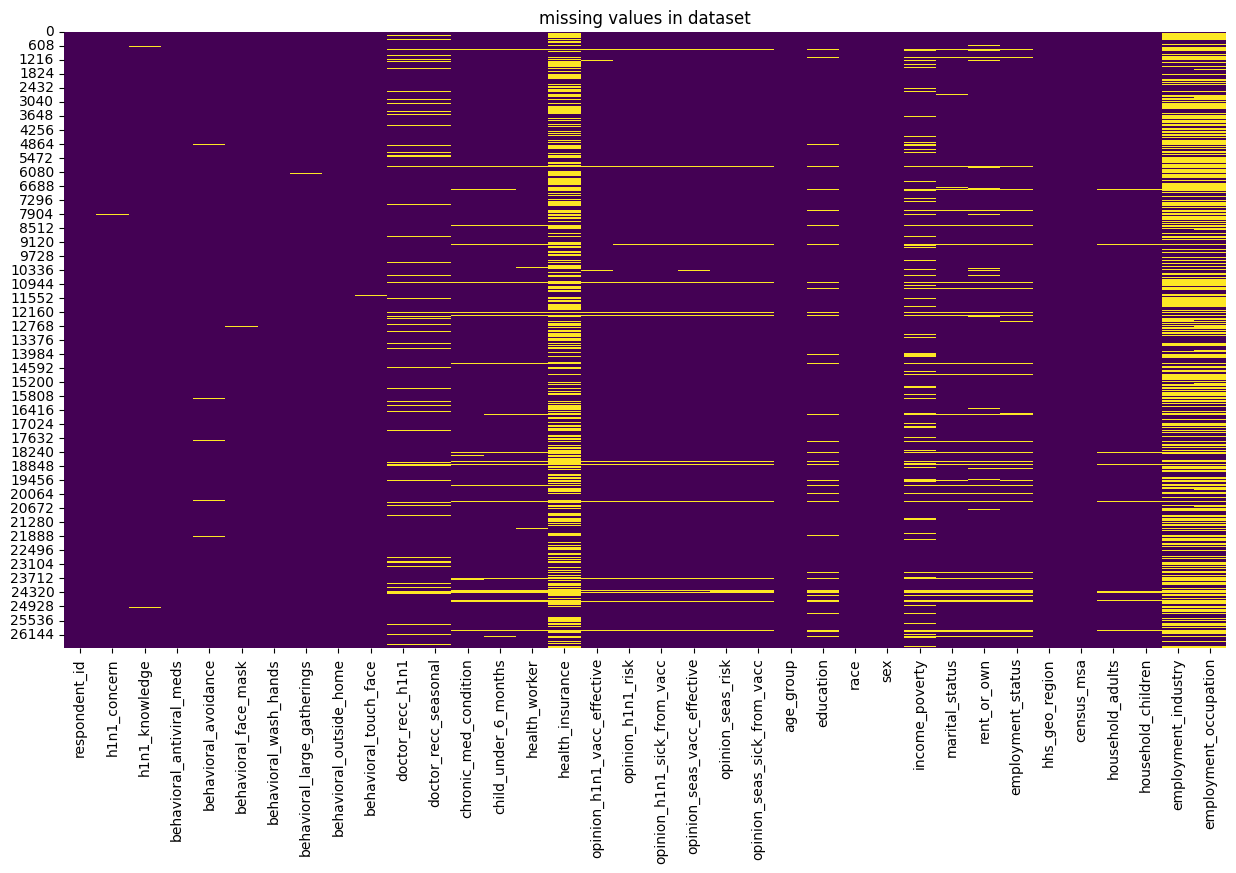

Preprocessing abgeschlossen.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# load data
file_path = "test_set_features.csv"
data = pd.read_csv(file_path)

# calculation of missing values per column
missing_values_abs = data.isnull().sum()
missing_values_percent = (data.isnull().sum() / data.shape[0]) * 100

# summarize missing values in a DataFrame
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_abs,
    'Percentage (%)': missing_values_percent
}).sort_values(by='Missing Values', ascending=False)
print(missing_values_summary)


# visualization of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('missing values in dataset')
plt.show()

# save missing values in CSV
missing_values_summary_path = 'missing_values_summary_testset.csv'
missing_values_summary.to_csv(missing_values_summary_path)


# replace with "missing" if no value in this column
for col in ['employment_occupation', 'employment_industry', 'health_insurance', "opinion_h1n1_vacc_effective", 'income_poverty', 'rent_or_own', 'employment_status',
             "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc", 'education']:
    data[col].fillna('missing', inplace=True)

# imputation for numerical variables by the median
numerical_cols = ['household_adults', 'household_children']
num_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# imputation for the remaining variables with the most frequently occurring value
categorical_cols = ['marital_status', 'doctor_recc_h1n1', 
                    'doctor_recc_seasonal', 'chronic_med_condition', "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands",
                    'child_under_6_months', 'health_worker', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', "behavioral_large_gatherings",
                    "behavioral_outside_home", "behavioral_touch_face"]

cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])


# save cleaned data in CSV
data.to_csv('test_set_features_cleaned.csv', index=False)
print("Preprocessing abgeschlossen.")

# Examining the data and plotting demographical characterictics

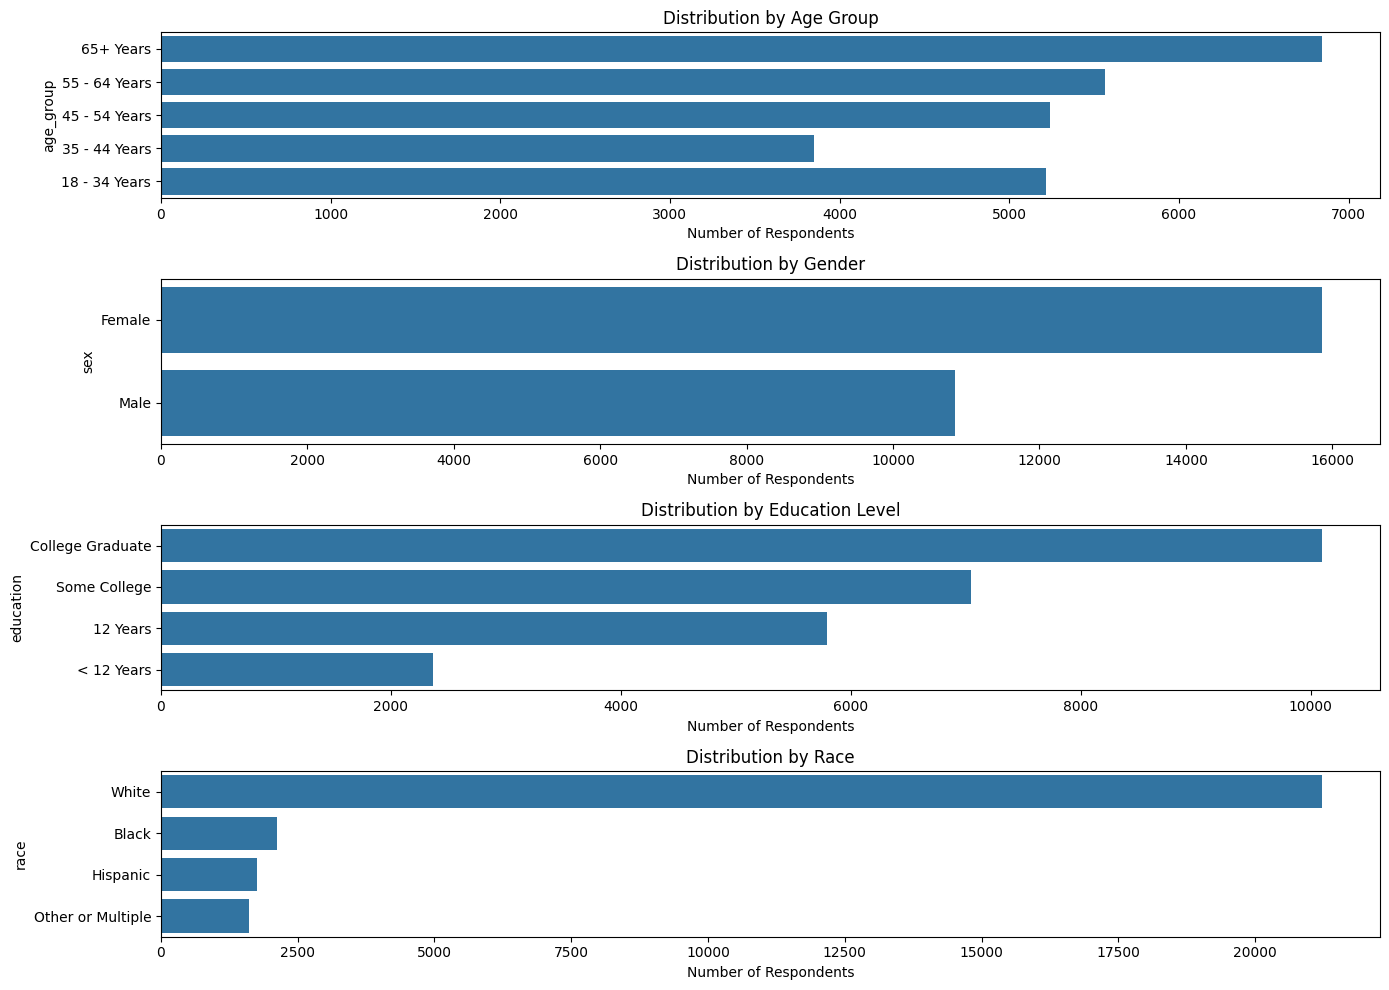

In [3]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
features_path = 'training_set_features.csv'
features = pd.read_csv(features_path)

# set age group order for plot
age_order = ['65+ Years', '55 - 64 Years', '45 - 54 Years', '35 - 44 Years','18 - 34 Years']

# making sure categorical data is formatted correctly
features['age_group'] = pd.Categorical(features['age_group'], categories=age_order, ordered=True)
features['education'] = features['education'].astype('category')
features['sex'] = features['sex'].astype('category')
features['race'] = features['race'].astype('category')


### Plots

# age group
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
sns.countplot(y='age_group', data=features, order=age_order)
plt.title('Distribution by Age Group')
plt.xlabel('Number of Respondents')

# sex
plt.subplot(4, 1, 2)
sns.countplot(y='sex', data=features)
plt.title('Distribution by Gender')
plt.xlabel('Number of Respondents')

# education
plt.subplot(4, 1, 3)
sns.countplot(y='education', data=features, order=features['education'].value_counts().index)
plt.title('Distribution by Education Level')
plt.xlabel('Number of Respondents')

# race
plt.subplot(4, 1, 4)
sns.countplot(y='race', data=features, order=features['race'].value_counts().index)
plt.title('Distribution by Race')
plt.xlabel('Number of Respondents')


plt.tight_layout()
plt.show()


# Data understanding: plotting distribution of target variables

C:\Users\maxim\AppData\Local\Temp\ipykernel_17112\119687389.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='h1n1_vaccine', data=labels, palette=colors)
C:\Users\maxim\AppData\Local\Temp\ipykernel_17112\119687389.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='seasonal_vaccine', data=labels, palette=colors)


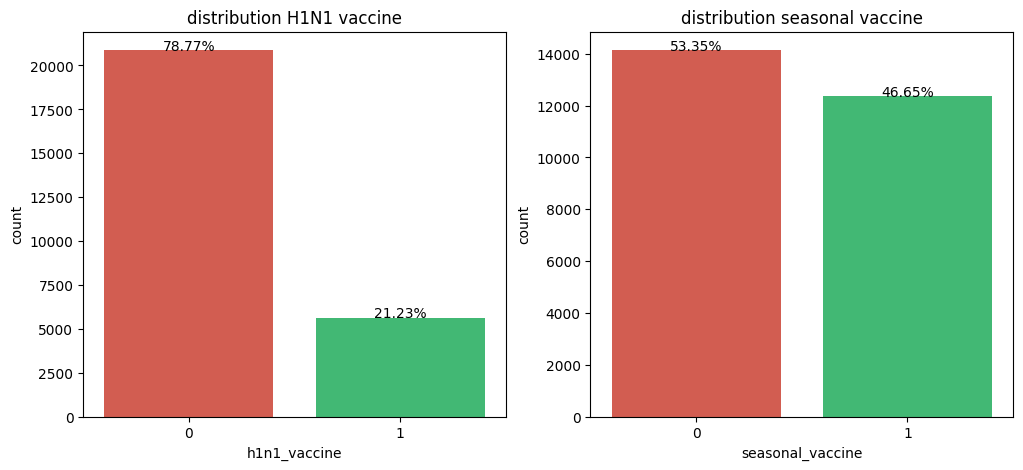

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# load data
labels_path = 'training_set_labels_cleaned.csv'
features_path = 'training_set_features_cleaned.csv'
labels = pd.read_csv(labels_path)
features = pd.read_csv(features_path)


# configure plot
plt.figure(figsize=(12, 5))
colors = ["#E74C3C", "#2ECC71"] 

# plot H1N1-vaccine distribution
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='h1n1_vaccine', data=labels, palette=colors)
plt.title('distribution H1N1 vaccine')
total_h1n1 = len(labels['h1n1_vaccine'])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height, '{:1.2f}%'.format(100 * height/total_h1n1), ha="center")

# plot seasonal vaccine distribution
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='seasonal_vaccine', data=labels, palette=colors)
plt.title('distribution seasonal vaccine')
total_seasonal = len(labels['seasonal_vaccine'])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height, '{:1.2f}%'.format(100 * height/total_seasonal), ha="center")

plt.show()

# Data understanding: Chi-square test

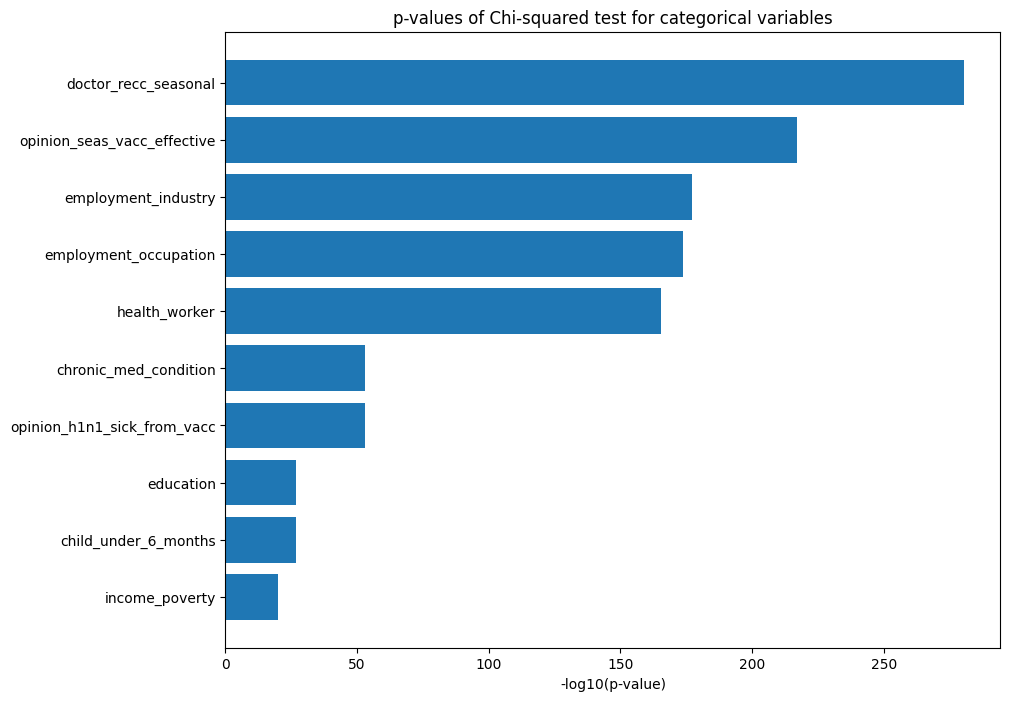

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# load data
features_path = 'training_set_features_cleaned.csv'
labels_path = 'training_set_labels_cleaned.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# merge features and labels
data_combined = pd.merge(features, labels, on='respondent_id')

# list of categorical columns
categorical_cols = ['employment_occupation', 'employment_industry',
                    "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective",
                    'income_poverty','education', 
                    'doctor_recc_seasonal', 'chronic_med_condition', 
                    'child_under_6_months', 'health_worker', 
                    ]  

# store Chi-square test results
chi2_results = []

for var in categorical_cols:
    contingency_table = pd.crosstab(data_combined[var], data_combined['h1n1_vaccine'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results.append((var, p))


chi2_results.sort(key=lambda x: x[1])


# extract variables and p-values 
variables, p_values = zip(*chi2_results)

# plot p-values
plt.figure(figsize=(10, 8))
plt.barh(variables, [-np.log10(p) for p in p_values])
plt.xlabel('-log10(p-value)')
plt.title('p-values of Chi-squared test for categorical variables')
plt.gca().invert_yaxis() 
plt.show()

# One-Hot Encoding of categorical variables

In [11]:
import pandas as pd

# load data
file_path = "training_set_features_cleaned.csv"
file_path2 = "test_set_features_cleaned.csv"
data = pd.read_csv(file_path)
test_data = pd.read_csv(file_path2)

# list of categorical columns
categorical_cols = ['employment_occupation', 'employment_industry', 'health_insurance', "opinion_h1n1_vacc_effective",
                   "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
                    'income_poverty', 'rent_or_own', 'employment_status', 
                    'marital_status', 'education', 'doctor_recc_h1n1', 
                    'doctor_recc_seasonal', 'chronic_med_condition', 
                    'child_under_6_months', 'health_worker', 'age_group', 'race', 'sex', 
                    'hhs_geo_region', 'census_msa']  

# one-hot-encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=int)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True, dtype=int)

# save encoded data
data_encoded.to_csv("training_set_features_encoded.csv", index=False)
test_data_encoded.to_csv("test_set_features_encoded.csv", index=False)

print("One-Hot-Encoding abgeschlossen")

One-Hot-Encoding abgeschlossen


# Making sure data got cleaned and transformed correctly

In [8]:
import pandas as pd
import numpy as np

# load data
file_path = "training_set_features_cleaned.csv"
data = pd.read_csv(file_path)


# check for respondent_id's with 20 or more missing values
data['missing_values_count'] = data.isnull().sum(axis=1)
ids_to_remove = data[data['missing_values_count'] >= 20]['respondent_id']
print("IDs zum Entfernen:", ids_to_remove.tolist())

# list of categorical columns
categorical_cols = ['employment_occupation', 'employment_industry', 'health_insurance', "opinion_h1n1_vacc_effective",
                   "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
                    'income_poverty', 'rent_or_own', 'employment_status', 
                    'marital_status', 'education', 'doctor_recc_h1n1', 
                    'doctor_recc_seasonal', 'chronic_med_condition', 
                    'child_under_6_months', 'health_worker']  

# check for unique values
for col in categorical_cols:
    print(f"Einzigartige Werte in {col}: {data[col].unique()}\n")

IDs zum Entfernen: []
Einzigartige Werte in employment_occupation: ['missing' 'xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' 'xqwwgdyp'
 'ccgxvspp' 'qxajmpny' 'kldqjyjy' 'mxkfnird' 'hfxkjkmi' 'bxpfxfdn'
 'ukymxvdu' 'cmhcxjea' 'haliazsg' 'dlvbwzss' 'xzmlyyjv' 'oijqvulv'
 'rcertsgn' 'tfqavkke' 'hodpvpew' 'uqqtjvyb' 'pvmttkik' 'dcjcmpih']

Einzigartige Werte in employment_industry: ['missing' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']

Einzigartige Werte in health_insurance: ['1.0' 'missing' '0.0']

Einzigartige Werte in opinion_h1n1_vacc_effective: ['3.0' '5.0' '4.0' '2.0' '1.0' 'missing']

Einzigartige Werte in opinion_h1n1_risk: ['1.0' '4.0' '3.0' '2.0' '5.0' 'missing']

Einzigartige Werte in opinion_h1n1_sick_from_vacc: ['2.0' '4.0' '1.0' '5.0' '3.0' 'missing']

Einzigartige Werte in opinion_seas_va

# Hyperparameter tuning for kNN model

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# merge features and labels
data = features.merge(labels, on='respondent_id')

# split data into features (X) and labels (y) for both models
X = data.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = data['h1n1_vaccine']
y_seasonal = data['seasonal_vaccine']

# split into training and test set
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# define hyperparameter grid
param_grid = {
    'n_neighbors': [2, 5, 10, 30, 75, 106, 160],
    'metric': ['euclidean', 'manhattan', 'hamming']
}

# function to show top 10 results
def display_top_10_results(grid_search):
    cv_results = grid_search.cv_results_
    top10_idx = np.argsort(cv_results['mean_test_score'])[-10:]
    print("Top 10 Scores und ihre Parameter:")
    for idx in top10_idx[::-1]:
        print(f"Score: {cv_results['mean_test_score'][idx]:.4f}, Params: {cv_results['params'][idx]}")

# GridSearchCV for h1n1 model
grid_search_h1n1 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search_h1n1.fit(X_train, y_train_h1n1)
print("Beste Parameter für H1N1-Modell:", grid_search_h1n1.best_params_)
display_top_10_results(grid_search_h1n1)

# GridSearchCV for seasonal model
grid_search_seasonal = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search_seasonal.fit(X_train, y_train_seasonal)
print("Beste Parameter für saisonales Modell:", grid_search_seasonal.best_params_)
display_top_10_results(grid_search_seasonal)


Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.813 total time=   0.2s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.813 total time=   0.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.808 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.813 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.810 total time=   0.2s
[CV 1/5] END ...metric=euclidean, n_neighbors=5;, score=0.825 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=5;, score=0.819 total time=   0.2s
[CV 3/5] END ...metric=euclidean, n_neighbors=5;, score=0.821 total time=   0.2s
[CV 4/5] END ...metric=euclidean, n_neighbors=5;, score=0.827 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=5;, score=0.827 total time=   0.2s
[CV 1/5] END ..metric=euclidean, n_neighbors=10;, score=0.835 total time=   0.1s
[CV 2/5] END ..metric=euclidean, n_neighbors=10

KeyboardInterrupt: 

# kNN model implementation

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels.csv'
test_features_path = 'test_set_features_encoded.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)
test_features = pd.read_csv(test_features_path)

# merge features and labels
data = features.merge(labels, on='respondent_id')

# split data into features (X) and labels (y) for both models
X = data.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = data['h1n1_vaccine']
y_seasonal = data['seasonal_vaccine']

# drop respondent_id from testset
X_test = test_features.drop(['respondent_id'], axis=1)

# model training for h1n1
knn_h1n1 = KNeighborsClassifier(metric='manhattan', n_neighbors=75)
knn_h1n1.fit(X, y_h1n1)

# model training for seasonal
knn_seasonal = KNeighborsClassifier(metric='hamming', n_neighbors=75)
knn_seasonal.fit(X, y_seasonal)

# make predictions for testset
h1n1_vaccine_pred = knn_h1n1.predict_proba(X_test)[:, 1]
seasonal_vaccine_pred = knn_seasonal.predict_proba(X_test)[:, 1]

# saving predictions in CSV
submission = test_features[['respondent_id']].copy()
submission['h1n1_vaccine'] = h1n1_vaccine_pred
submission['seasonal_vaccine'] = seasonal_vaccine_pred
submission.to_csv('submission_knn.csv', index=False)

print("kNN Predictions erfolgreich gespeichert.")


kNN Predictions erfolgreich gespeichert.


# Hyperparameter tuning for SVM model

In [ ]:
import pandas as pd
import optuna
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from optuna.samplers import TPESampler

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels_cleaned.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)
X = features.drop(['respondent_id'], axis=1)
y_h1n1 = labels['h1n1_vaccine']
y_seasonal = labels['seasonal_vaccine']

# hyperparameter tuning
def objective(X, y, trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    
    # SVM model
    clf = SVC(C=C, kernel=kernel, gamma=gamma, probability=True)
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# optuna study for H1N1
study_h1n1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study_h1n1.optimize(partial(objective, X, y_h1n1), n_trials=100)

print("H1N1 beste Parameter:", study_h1n1.best_params)
print("H1N1 bester Cross-Validation Score:", study_h1n1.best_value)

# optuna study for seasonal
study_seasonal = optuna.create_study(direction='maximize', sampler=TPESampler())
study_seasonal.optimize(partial(objective, X, y_seasonal), n_trials=100)

print("\nseasonal beste Parameter:", study_seasonal.best_params)
print("seasonal bester Cross-Validation Score:", study_seasonal.best_value)


# SVM model implementation

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels_cleaned.csv'
test_features_path = 'test_set_features_encoded.csv'
submission_format_path = 'submission_format.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)
test_features = pd.read_csv(test_features_path)
submission_format = pd.read_csv(submission_format_path)

# preparing data
X = features.drop(['respondent_id'], axis=1)
y_h1n1 = labels['h1n1_vaccine']
y_seasonal = labels['seasonal_vaccine']
X_test_submission = test_features.drop(['respondent_id'], axis=1)

# scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_submission_scaled = scaler.transform(X_test_submission)

# defining hyperparameters
optimal_params = {'C': 0.022770434858826624, 'kernel': 'linear', 'gamma': 'auto'}

# initialise models for H1N1 and seasonal
svm_h1n1 = SVC(**optimal_params, probability=True)
svm_seasonal = SVC(**optimal_params, probability=True)

# train SVM model for H1N1
svm_h1n1.fit(X_scaled, y_h1n1)

# train SVM model for seasonal
svm_seasonal.fit(X_scaled, y_seasonal)

# make predictions for testset
h1n1_proba = svm_h1n1.predict_proba(X_test_submission_scaled)[:, 1]
seasonal_proba = svm_seasonal.predict_proba(X_test_submission_scaled)[:, 1]

# save submission file
submission = submission_format.copy()
submission['h1n1_vaccine'] = h1n1_proba
submission['seasonal_vaccine'] = seasonal_proba
submission.to_csv('submission_svm.csv', index=False)

print("SVM submission erfolgreich gespeichert.")


SVM submission erfolgreich gespeichert.


# Hyperparameter tuning for XGB model (H1N1)

In [16]:
import pandas as pd
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# merge features and labels and clean special characters in columns
data = features.merge(labels, on='respondent_id')
data.columns = [col.replace(">", "gt").replace("<", "lt").replace("[", "").replace("]", "") for col in data.columns]

# split data into features (X) and labels (y) for H1N1
X = data.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = data['h1n1_vaccine']

# split into training and test set
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)

# hyperparameter tuning
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }

    clf = xgb.XGBClassifier(**param)
    clf.fit(X_train, y_train_h1n1, eval_set=[(X_test, y_test_h1n1)], early_stopping_rounds=50, verbose=False)
    preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test_h1n1, preds)
    return accuracy

# create optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)


# show top 10 studies (parameter combinations)
top10_trials = sorted(study.trials, key=lambda trial: trial.value, reverse=True)[:10]
for i, trial in enumerate(top10_trials, start=1):
    print(f"Rank {i}: Score {trial.value}, Params {trial.params}")

[I 2024-03-03 10:28:52,983] A new study created in memory with name: no-name-1f2144ae-1a73-4eeb-828a-4bf2f9912caa
c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-03-03 10:28:53,693] Trial 0 finished with value: 0.8527248727135583 and parameters: {'n_estimators': 604, 'learning_rate': 0.03348592022872604, 'max_depth': 7, 'subsample': 0.8104372719554136, 'colsample_bytree': 0.9427240086108681}. Best is trial 0 with value: 0.8527248727135583.
c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-03-0

KeyboardInterrupt: 

# Hyperparameter tuning for XGB model (seasonal)

In [17]:
import pandas as pd
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# merge features and labels and clean special characters in columns
data = features.merge(labels, on='respondent_id')
data.columns = [col.replace(">", "gt").replace("<", "lt").replace("[", "").replace("]", "") for col in data.columns]

# split data into features (X) and labels (y) for seasonal
X = data.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_seasonal = data['seasonal_vaccine']

# split into training and test set
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# hyperparameter tuning
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }

    clf = xgb.XGBClassifier(**param)
    clf.fit(X_train, y_train_seasonal, eval_set=[(X_test, y_test_seasonal)], early_stopping_rounds=50, verbose=False)
    preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test_seasonal, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)


# show top 10 studies (parameter combinations)
top10_trials = sorted(study.trials, key=lambda trial: trial.value, reverse=True)[:10]
for i, trial in enumerate(top10_trials, start=1):
    print(f"Rank {i}: Score {trial.value}, Params {trial.params}")

[I 2024-03-03 10:29:17,447] A new study created in memory with name: no-name-7fcf985a-e24b-4259-834b-238d3ce6965e
c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-03-03 10:29:17,749] Trial 0 finished with value: 0.7835187629643598 and parameters: {'n_estimators': 514, 'learning_rate': 0.17899545411682571, 'max_depth': 4, 'subsample': 0.793067889800738, 'colsample_bytree': 0.8856614808722041}. Best is trial 0 with value: 0.7835187629643598.
c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-03-03

XGBoostError: [10:29:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\data\proxy_dmatrix.h:158: Unknown type: void

# XGB model implementation (and plotting feature importance)

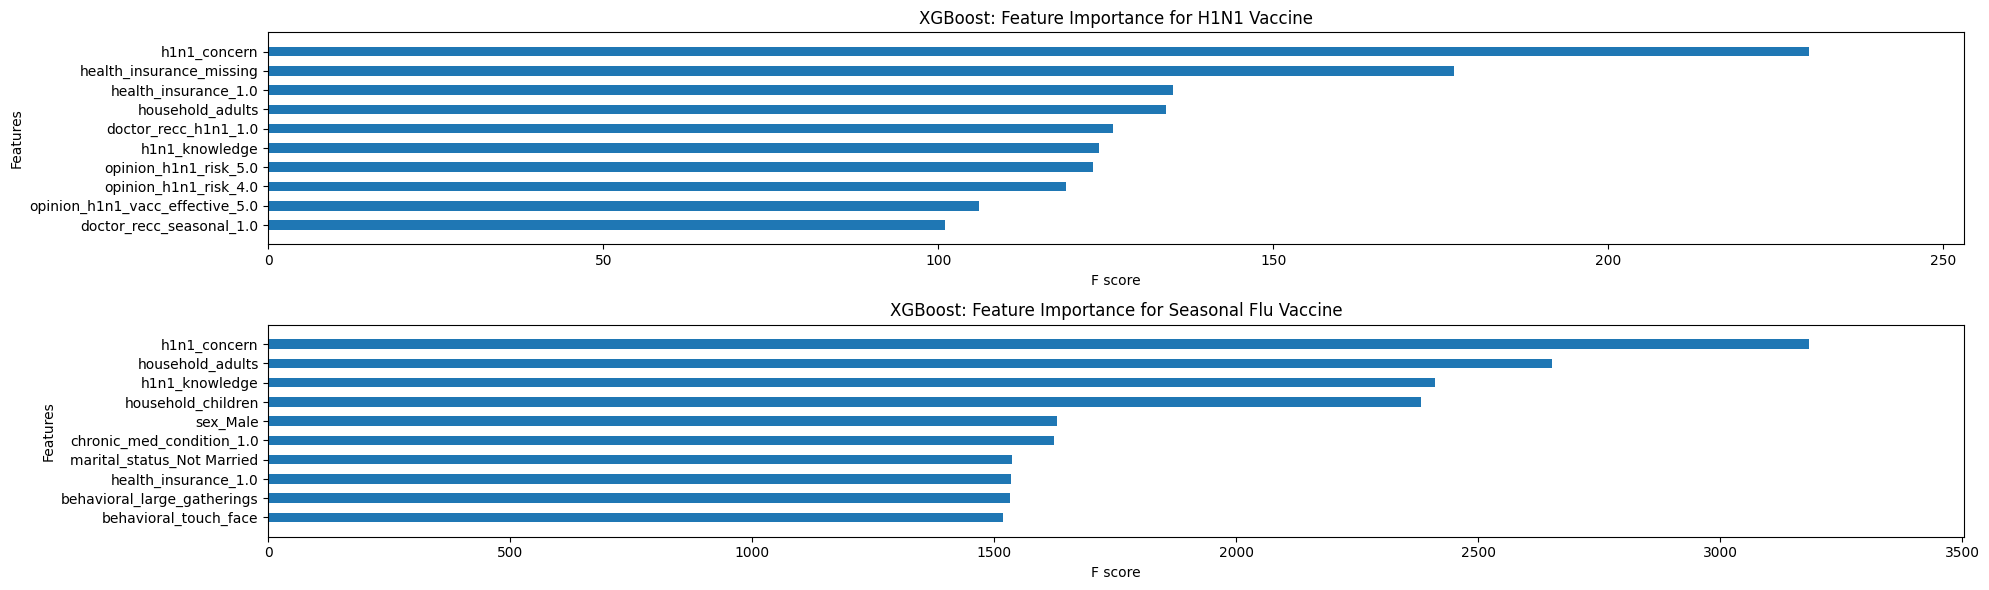

submission saved


In [18]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# load data
features_path = 'training_set_features_encoded.csv'
labels_path = 'training_set_labels_cleaned.csv'
test_features_path = 'test_set_features_encoded.csv'
submission_format_path = 'submission_format.csv'
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)
test_features = pd.read_csv(test_features_path)
submission_format = pd.read_csv(submission_format_path)


# clean column names as model has problems with those symbols
def clean_column_names(df):
    df.columns = [col.replace(">", "gt").replace("<", "lt").replace("[", "").replace("]", "").replace(",", "").replace("=", "eq") for col in df.columns]
    return df


# data preperation
X = features.drop(['respondent_id'], axis=1)
y_h1n1 = labels['h1n1_vaccine']
y_seasonal = labels['seasonal_vaccine']
X_test_submission = test_features.drop(['respondent_id'], axis=1)
X = clean_column_names(X)
X_test_submission = clean_column_names(X_test_submission)

# hyper parameters
params_h1n1 = {'n_estimators': 837, 'learning_rate': 0.059377378770111296, 'max_depth': 3, 'subsample': 0.9448834828833715, 'colsample_bytree': 0.8180301609939452}
params_seasonal = {'n_estimators': 429, 'learning_rate': 0.02729221792750674, 'max_depth': 9, 'subsample': 0.8743368970026256, 'colsample_bytree': 0.698013566864418}

# initialize and train models
model_h1n1 = xgb.XGBClassifier(**params_h1n1, use_label_encoder=False, eval_metric='logloss')
model_seasonal = xgb.XGBClassifier(**params_seasonal, use_label_encoder=False, eval_metric='logloss')
model_h1n1.fit(X, y_h1n1)
model_seasonal.fit(X, y_seasonal)

# predictions for the testset
h1n1_proba = model_h1n1.predict_proba(X_test_submission)[:, 1]
seasonal_proba = model_seasonal.predict_proba(X_test_submission)[:, 1]


### plot feature importance for both models
fig, axs = plt.subplots(2, 1, figsize=(20, 6))

# H1N1
xgb.plot_importance(model_h1n1, max_num_features=10, importance_type='weight', height=0.5, ax=axs[0], show_values=False)
axs[0].set_title('XGBoost: Feature Importance for H1N1 Vaccine')
axs[0].grid(False) 
# seasonal
xgb.plot_importance(model_seasonal, max_num_features=10, importance_type='weight', height=0.5, ax=axs[1], show_values=False)
axs[1].set_title('XGBoost: Feature Importance for Seasonal Flu Vaccine')
axs[1].grid(False) 

plt.tight_layout()
plt.show()


# create submission file
submission = submission_format.copy()
submission['h1n1_vaccine'] = h1n1_proba
submission['seasonal_vaccine'] = seasonal_proba

submission.to_csv('submission_xgb.csv', index=False)

print("submission saved")